# Excercise Exploratory Data Analysis

For this lab, we'll explore some data from a very useful source, the UC Irvine machine learning data repository.

Especially, we will be using this dataset, https://archive.ics.uci.edu/ml/datasets/Heart+Disease. Here our goal is to know whether a disease is present or not.

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0). 

**Goal: Can you find nice relationships, and do exploratory analysis to come up some data supported conclusions**

In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10.0, 8.0)

In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv('./Data/processed.cleveland.data')  
df.columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']                                

> TODO: How many rows are there in the dataset?


In [5]:
print df.dtypes # what can you conclude...

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
num           int64
dtype: object


## Data Cleaning

First we have to clean and sanitize the data. This data is pretty clean and is mostly numeric but contains some '?' in some fields.  To make it easier to handle, we convert those fields to ```None```. For convenience, you should define a function "safefloat" that takes a string argument, and returns None if the argument is '?', otherwise the float value of the string. 

In [7]:
# TODO write safefloat
def safefloat(string):
    return None if string == '?' else float(string)

Find which fields contain '?' and try applying safefloat to fields containing '?' to make sure it is working. After that it can be used, when required.

In [8]:
dfnumpy = np.array(df)
dfnumpy[dfnumpy == '?'] = None
#print np.where(dfnumpy == '?', None, (dfnumpy).astype(float))
dfnumpy = dfnumpy.astype(float)
print dfnumpy 

[[ 67.   1.   4. ...,   3.   3.   2.]
 [ 67.   1.   4. ...,   2.   7.   1.]
 [ 37.   1.   3. ...,   0.   3.   0.]
 ..., 
 [ 57.   1.   4. ...,   1.   7.   3.]
 [ 57.   0.   2. ...,   1.   3.   1.]
 [ 38.   1.   3. ...,  nan   3.   0.]]


#### Column names 

In [12]:
headers = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

Define a function "getcol" that takes a column name and returns the data in that column as a list of numbers.

In [15]:
def getcol(name): # TODO write getcol
    return dfnumpy[:, headers.index(name)]

## Basic Statistics

What is the minimum, maximum, mean and standard deviation of the age of this set of subjects? Use the numpy package with contains the mean() and std() functions. 

In [16]:
def stats(col):
    temp = getcol(col)
    return temp.min(), temp.max(), temp.mean(), temp.std()

In [21]:
stats('age')

(29.0, 77.0, 54.410596026490069, 9.0251829598807554)

## Histograms of Data Fields

Implement the function ```plot_hist``` that:

    Takes two strings, col name and it's unit as arguments
    Get the data of col using the function get_col implemented above
    Create a figure with one subplot
    Plot the histogram of the coloumn
    Set the unit as ylabel
    Set the col name as title
    Show the figure

In [24]:
# Write your code here
def plot_hist(col, unit):
    temp = getcol(col)
    fig, ax = plt.subplots()
    ax.hist(temp)
    ax.set_ylabel(unit)
    ax.set_title(col)
    return None 

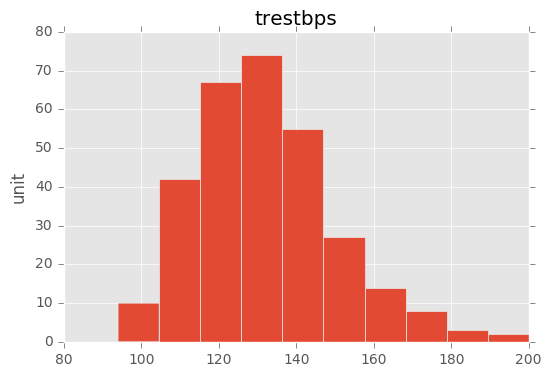

In [25]:
# Write your code here
plot_hist('trestbps', 'unit')

> TODO
Describe the rough shape of the distribution of bps.
Is it skewed? 

# Write your answer here
Yes, it is possitively skewed.

## Scatter Plots

Implement the function ```plot_scatter``` that:

    Takes four strings, col1 , col2 , unit1 and unit2 as arguments
    Get the data of cols using the function get_col implemented above
    Create a figure with one subplot
    Plot the histogram of the coloumn
    Set the appropriate units as x and y labels
    Set the title by concatinating col names
    Show the figure

In [32]:
# Write your code here
def plot_scatter(col1, col2, unit1, unit2):
    list1 = getcol(col1)
    list2 = getcol(col2)
    fig, ax = plt.subplots()
    ax.scatter(list1, list2)
    ax.set_title(col1+' vs '+col2)
    ax.set_xlabel(unit1)
    ax.set_ylabel(unit2)
    return

Make scatter plots of:
*    age vs bp (resting blood pressure) 
*    age vs thalach (max heart rate)
    

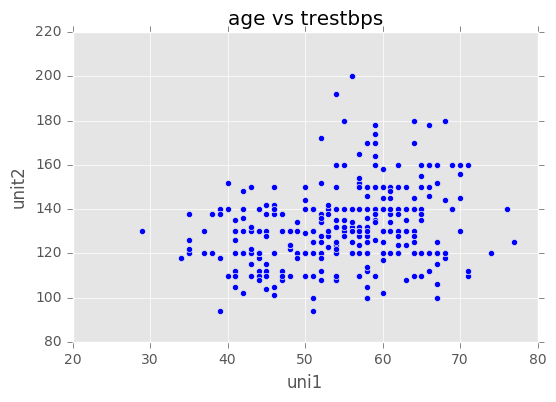

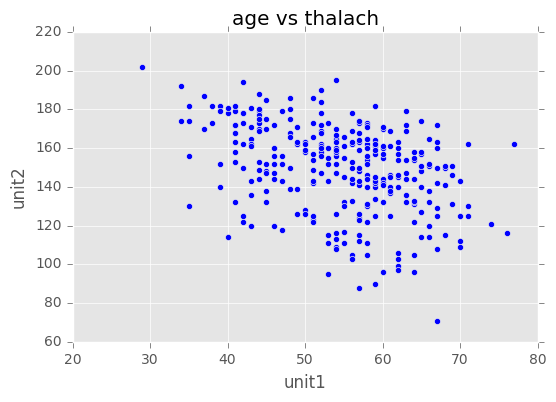

In [34]:
# Write your code here
plot_scatter('age','trestbps', 'uni1','unit2' )
plot_scatter('age', 'thalach', 'unit1', 'unit2')

## Critical Thinking with Data

Think about relationship between blood pressure and heart disease

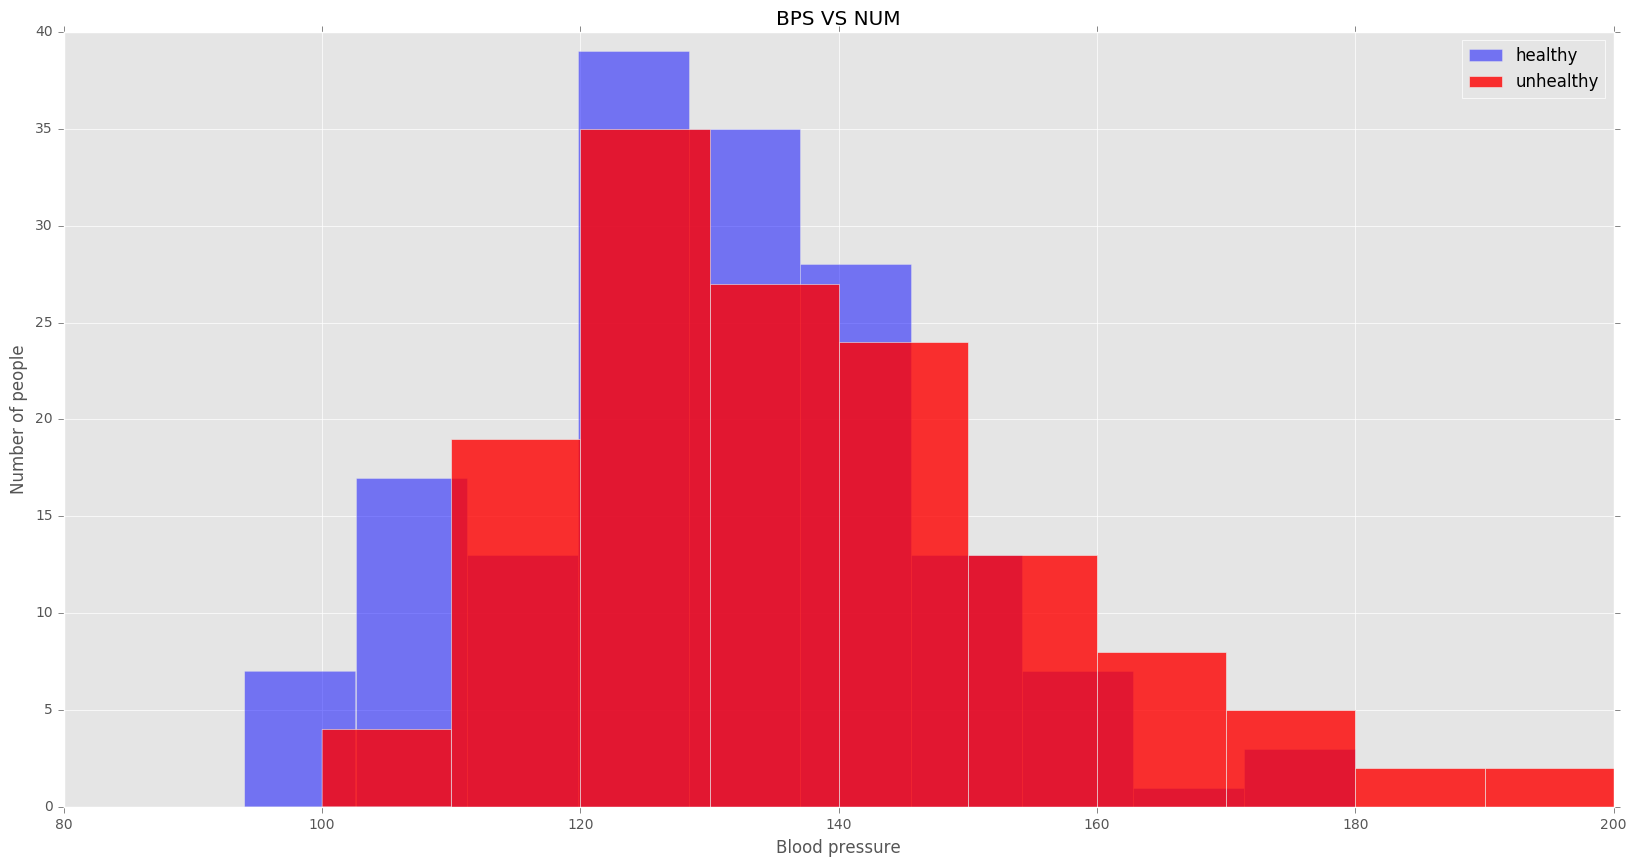

In [80]:
fig, ax = plt.subplots(figsize=(20, 10))
labels = getcol('num')
bps = getcol('trestbps')
ax.hist(bps[labels == 0], alpha = 0.5, color = 'blue', label='healthy')
ax.hist(bps[labels != 0], alpha = 0.8, color = 'red', label ='unhealthy')
ax.set_ylabel('Number of people')
ax.set_xlabel('Blood pressure')
ax.legend() 
ax.set_title('BPS VS NUM')

> TODO: Based on this plot, do you think blood pressure influences heart disease?

Now repeat this plot of age versus num:

> TODO: Based on this plot of Age vs Num and the previous plot of Age vs BPS, what would you say now about the relation between BPS and Num?

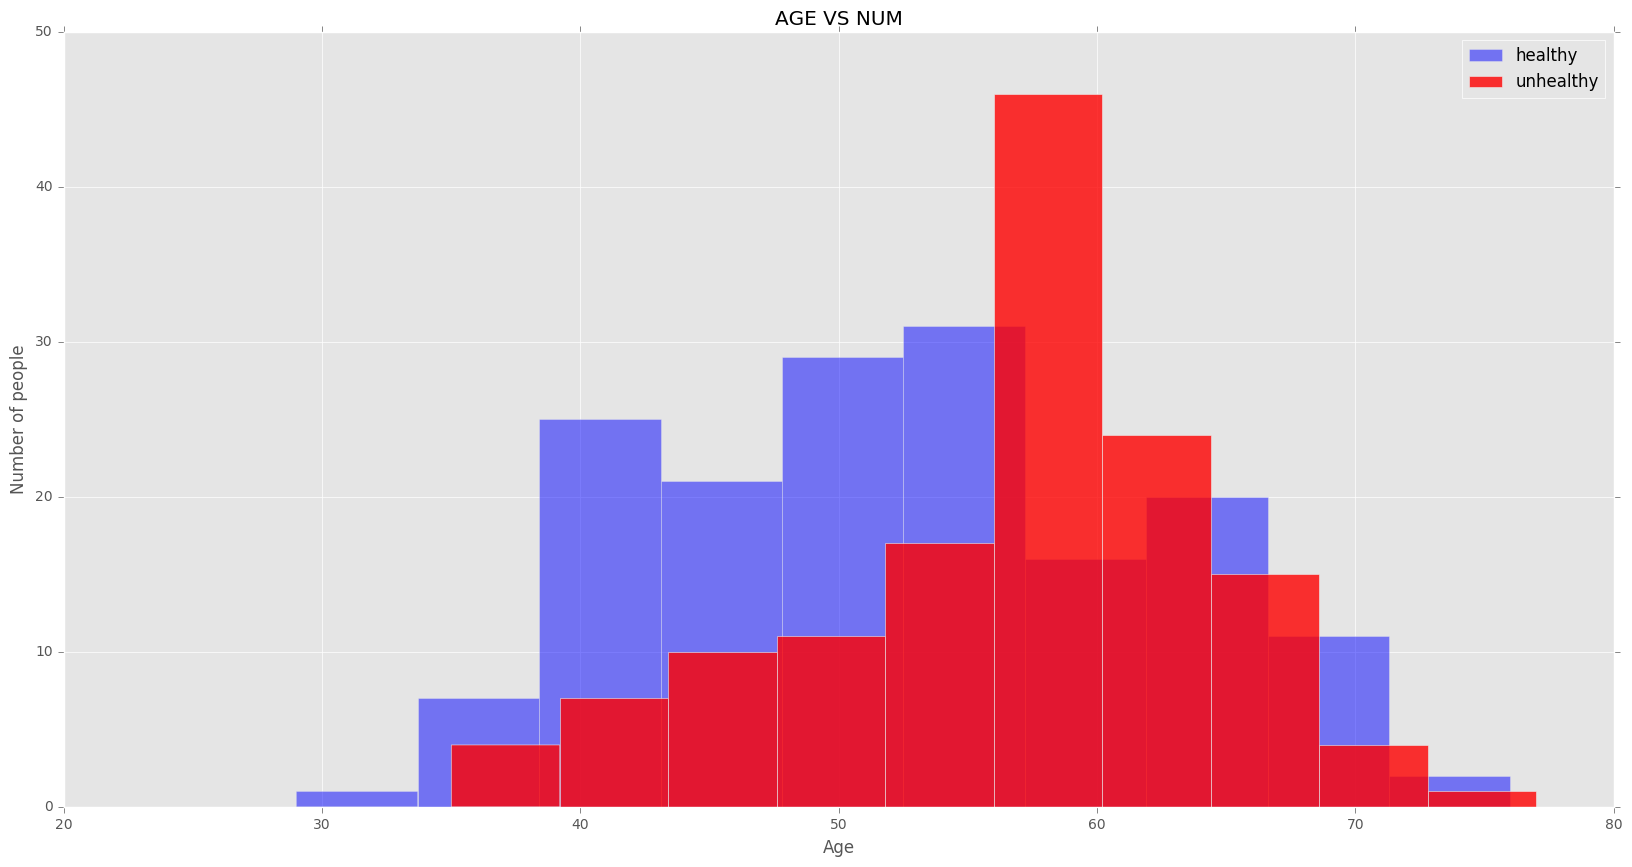

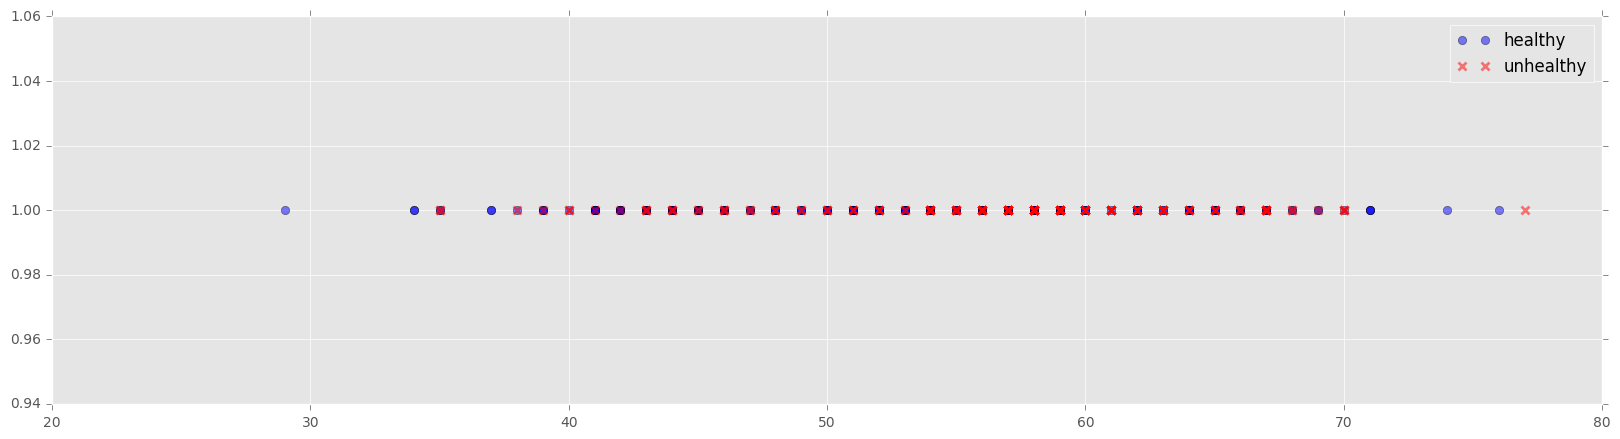

In [79]:
fig, ax = plt.subplots(figsize=(20, 10))

labels = getcol('num')
ages = getcol('age')
ax.hist(ages[labels == 0], alpha = 0.5, color = 'blue', label='healthy')
ax.hist(ages[labels != 0], alpha = 0.8, color = 'red', label ='unhealthy')
ax.set_ylabel('Number of people')
ax.set_xlabel('Age')
ax.legend() 
ax.set_title('AGE VS NUM')

fig, ax = plt.subplots(figsize = (20, 5))
dummydim = getcol('sex')
np.ones_like
plt.plot(ages[labels == 0], np.ones_like(ages[labels == 0]), 'bo', alpha = 0.5,
        label = 'healthy')
plt.plot(ages[labels != 0], np.ones_like(ages[labels != 0]), 'rx', alpha = 0.5,
        mew = 2, label = 'unhealthy')
plt.legend()

- First diagram indicates that even though uptil the age of 55, chances of healthiness are higher than disease, the disease chances still rise with the age. However, Chances of disease boost up at age of 60 after which there's a decline in disease chances. But even if there's a decline, disease chances are still higher than healthiness chances.  
- Second diagram indicates there most disease chances occur in between age of 40-70.

## Dimension Reduction

Recall that dimension reduction allows you to look at the dominant factors in high-dimensional data. Matplotlib includes the PCA function for this purpose. You use it like this:

In [82]:
# you may need to sanitize the data here

In [84]:
from matplotlib.mlab import PCA
cleveland_matrix = np.array(dfnumpy, dtype=np.float64) # First put the data in a 2D array of double-precision floats
print cleveland_matrix[:,0:8].shape

results = PCA(cleveland_matrix[:,0:8])                      # leave out columns with None in them
yy = results.Y                                              # returns the projections of the data into the principal component directions

(302, 8)


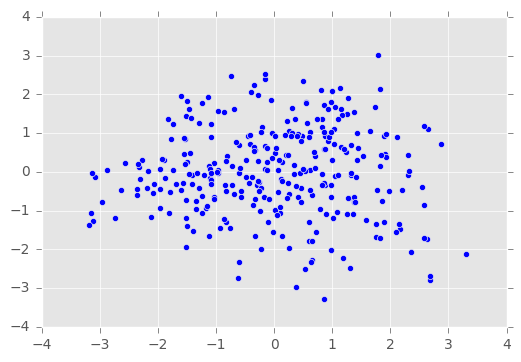

In [85]:
plt.scatter(yy[:,0],yy[:,1])

> TODO: Do you see a relationship between the two main variables (X and Y axes of this plot)?

Answer: As the variable on x-axis is increasing, the range of possibilities of y-axis variable are also increasing (roughly).   

### Get Creative
Now it's your turn to use the tools you have learned and find out intresting insights from the data.